Suorita noin 20s testimittaus eri antureilla, esimerkiksi kiihtyvyys, GPS ja magnetometri. Tuo data Pythoniin ja vastaa kaikkien anturien kohdalla seuraaviin kysymyksiin:

a: Onko näytteenottotaajuus vakio? Mikä on keskimääräinen näytteenottotaajuus?
b: Mitkä ovat näytteenottotaajuuden suurin ja pieni arvo aineistossa?
c: Piirrä näytteenottotaajuuden histogrammi kolmen eri anturin tapauksessa.

In [11]:
#Luetaan data
import pandas as pd
df1 = pd.read_csv('Acceleration.csv') #Time (s)
df2 = pd.read_csv('Magnetometer.csv')
df3 = pd.read_csv('Location.csv')

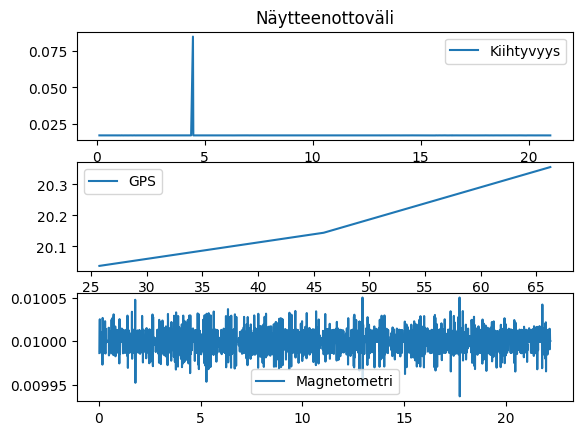

In [12]:
#Lasketaan peräkkäisten havaintojen välillä kuluva aika, 
#eli näytteenottoväli
import matplotlib.pyplot as plt
sampling_interval1 = df1['Time (s)'].diff() #Ei selvästi ole vakio
plt.subplot(3,1,1)
plt.plot(df1['Time (s)'],sampling_interval1)
plt.title('Näytteenottoväli')
plt.legend(['Kiihtyvyys'])
plt.subplot(3,1,2)
sampling_interval2 = df2['Time (s)'].diff() #Ei selvästi ole vakio
plt.plot(df2['Time (s)'],sampling_interval2)
plt.legend(['GPS'])
plt.subplot(3,1,3)
sampling_interval3 = df3['Time (s)'].diff() #Ei selvästi ole vakio
plt.plot(df3['Time (s)'],sampling_interval3)
plt.legend(['Magnetometri'])

In [21]:
print('Kiihtyvyysmittauksen keskimääräinen näytteenottoväli on: ',sampling_interval1.mean(), 's')
print('Ja näytteenottotaajuus: ',1/sampling_interval1.mean(), 'Hz')
print('Näytteenottotaajuuden minimi: ',(1/sampling_interval1).min(), 'Hz')
print('Näytteenottotaajuuden maksimi: ',(1/sampling_interval1).max(), 'Hz \n')

print('GPS-mittauksen keskimääräinen näytteenottoväli on: ',sampling_interval2.mean())
print('Ja näytteenottotaajuus: ',1/sampling_interval2.mean(), 'Hz')
print('Näytteenottotaajuuden minimi: ',(1/sampling_interval2).min(), 'Hz')
print('Näytteenottotaajuuden maksimi: ',(1/sampling_interval2).max(), 'Hz \n')

print('Magnetometrin keskimääräinen näytteenottoväli on: ',sampling_interval3.mean())
print('Ja näytteenottotaajuus: ',1/sampling_interval3.mean(), 'Hz')
print('Näytteenottotaajuuden minimi: ',(1/sampling_interval3).min(), 'Hz')
print('Näytteenottotaajuuden maksimi: ',(1/sampling_interval3).max(), 'Hz \n')

#Näytteenottotaajuuden vaihtelu on moniajon syytä


Kiihtyvyysmittauksen keskimääräinen näytteenottoväli on:  0.01705148900978793 s
Ja näytteenottotaajuus:  58.64590473160309 Hz
Näytteenottotaajuuden minimi:  11.768616939897806 Hz
Näytteenottotaajuuden maksimi:  58.96299771182468 Hz 

GPS-mittauksen keskimääräinen näytteenottoväli on:  20.179000001333332
Ja näytteenottotaajuus:  0.04955646959383145 Hz
Näytteenottotaajuuden minimi:  0.04912556494399685 Hz
Näytteenottotaajuuden maksimi:  0.049907670799040245 Hz 

Magnetometrin keskimääräinen näytteenottoväli on:  0.010000004031123139
Ja näytteenottotaajuus:  99.99995968878487 Hz
Näytteenottotaajuuden minimi:  99.50248756219231 Hz
Näytteenottotaajuuden maksimi:  100.63166496093952 Hz 



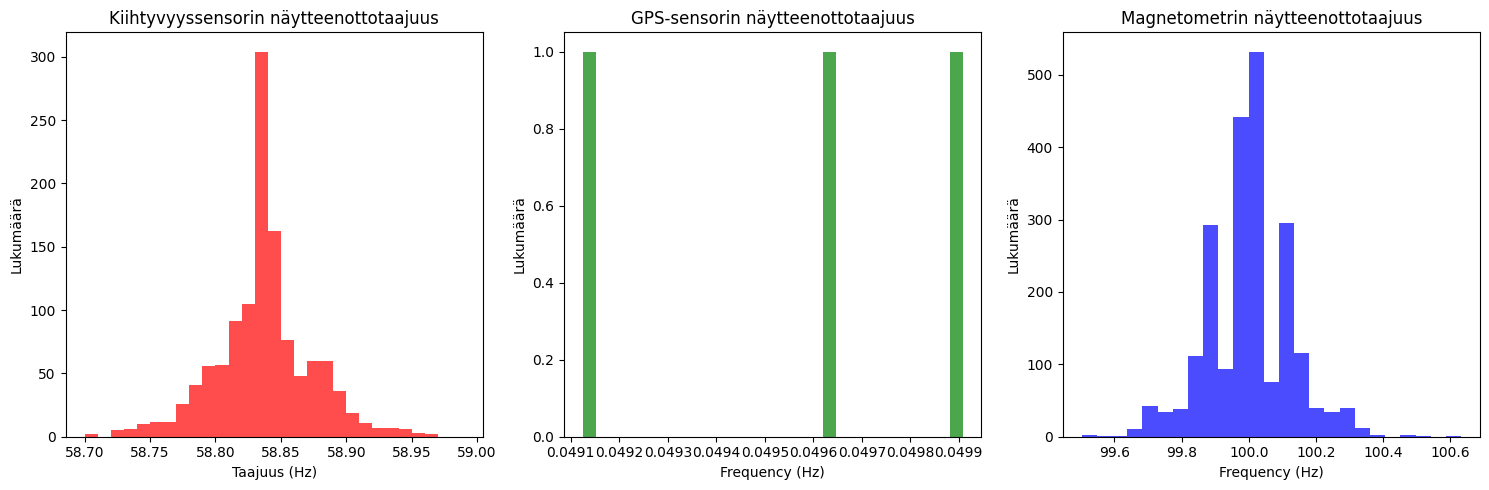

In [44]:
import numpy as np
#Lasketaan sampling frequency (näytteenottotaajuus)
sampling_freq1 = 1 / sampling_interval1
sampling_freq2 = 1 / sampling_interval2
sampling_freq3 = 1 / sampling_interval3

# Plotataan histogrammi
plt.figure(figsize=(15, 5))

# Ensimmäisen sensorin näytteenottotaajuus (Kiihtyvyys)
plt.subplot(1, 3, 1)
plt.hist(sampling_freq1, bins=np.arange(58.7,59,0.01), color='r', alpha=0.7)
plt.title('Kiihtyvyyssensorin näytteenottotaajuus')
plt.xlabel('Taajuus (Hz)')
plt.ylabel('Lukumäärä')

# Toisen sensorin näytteenottotaajuus (GPS)
plt.subplot(1, 3, 2)
plt.hist(sampling_freq2, bins=30, color='g', alpha=0.7)
plt.title('GPS-sensorin näytteenottotaajuus')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Lukumäärä')

# Kolmannen sensorin näytteenottotaajuus (Magnetometri)
plt.subplot(1, 3, 3)
plt.hist(sampling_freq3, bins=25, color='b', alpha=0.7)
plt.title('Magnetometrin näytteenottotaajuus')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Lukumäärä')

# Tehdään layoutista tiukempi
plt.tight_layout()

# Näytetään kuvaaja
plt.show()